# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Definiciones (por enunciado):

*   $e$ es un vector columna de unos de dimension n
*   $W$ es una matriz de conectividad tal que:

$$
\begin{equation} \nonumber
w_{ij} = \begin{cases}
1 & \text{si la página tiene un link de i a j}\\
0 & \text{caso contrario}
\end{cases}
\end{equation}
$$
$\hspace{0.5cm}$ y definimos $c_j$ como la cantidad de links salientes que tiene una página:
$$
\begin{equation} \nonumber
c_j = \sum_{i=1}^n w_{ij}
\end{equation}
$$

*   $z$ es un vector columna de unos de dimension $n$ tal que:
$$
\begin{equation} \nonumber
z_j = \begin{cases}
\frac{1 - p}{n} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}

\newline
$$
*   $D$ es una matriz diagonal de la forma

$$
\begin{equation} \nonumber
d_{jj} = \begin{cases}
\frac{1}{c_j} & \text{si } c_j \neq 0 \\
0 & \text{si } c_j = 0
\end{cases}
\end{equation}
\newline
$$
*   Formalmente, definimos la matriz $A = a_{ij}$, $A \in \mathbb{R}^{n \times n}$, donde $a_{ij}$ representa la probabilidad de pasar de la página j a la página i:

$$
\begin{equation} \nonumber
a_{ij} = \begin{cases}
\frac{1 - p}{n} + \frac{pw_{ij}}{c_j} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}
$$

Luego, debemos probar que $A=pWD+e.z^t$

Notamos que todas las variables de la derecha tienen su definición por enunciado. Notamos también que todas las definiciones partidas tienen como criterio que $c_j$ sea igual a cero o distinto de cero.

Por estas razones decidimos realizar la demostración de forma algebraica, y estudiando en los dos casos ($c_j$ igual a cero o distinto de cero).

Vamos a demostrar que $\forall$ $i, j, 1 \leq i,j \leq n$:
$$a_{ij} = p. (\sum_{k=1}^{n} w_{ik} \cdot d_{kj}) + e_i . z^t_j$$

* Como la matriz D es diagonal, entonces $d_{ik} = 0 \hspace{0.2cm} \forall k \neq j$, por lo que $\sum_{k=1}^{n} w_{ik} \cdot d_{kj} = w_{ij} \cdot d_{jj}$, dejando entonces
$$a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$

**Caso 1**: Si ${c_j\neq 0}$


Queremos ver que: $a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$

* Recordemos que para $c_j \neq 0$, $a_{ij} = \frac{1-p}{n}  + p \cdot w_{ij}.\frac{1}{c_j}$ por lo que queremos ver que:
$$p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n}  = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$ 



* Como $d_{jj} = \frac{1}{c_j}$ (porque $c_j \neq 0$), $e_i = 1$ y $z^t_j = \frac{1-p}{n}$ (porque $c_j \neq 0$), entonces queda:
$$p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n}  = p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n} $$

**Caso 2**: Si ${c_j = 0}$

*  Queremos ver que $a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$

* Recordemos que $a_{ij} = \frac{1}{n}$ por lo que queremos ver que:
$$\frac{1}{n} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$ 

* Pero $d_{jj} = 0$ cuando $c_j = 0$, por lo que 

$$e_i.z^t_j = \frac{1}{n} \newline$$

* Que es verdadero (porque $e_i=1$ y $z^t_j= \frac{1}{n}$ para ${c_j = 0}$)


De esta manera, demostramos la igualdad para cada índice de la matriz en todos los casos (cuando $c_j = 0$ y cuando $c_j \neq 0$). Concluyendo, queda demostrado algebraicamente que $A=pWD+e.z^t$

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

La existencia de la factorización $LU$ se garantiza asegurándonos de que no haya pivots nulos en el proceso de eliminación de Gauss. Nos podemos asegurar de esto utilizando el concepto de matriz *diagonal dominante*. Una matriz $A \in \mathbb{R}^{n \times n}$ se dice *diagonal dominante (estrictamente diagonal dominante)* y se denota *DD (EDD)* si y solo si para todo $i, 1\leq i\leq n$
$$\sum_{1 \leq j \leq n, j \neq i}|a_{i,j}| \leq (<) |a_{i,i}|$$
Es decir, el valor absoluto de cada elemento de la diagonal es mayor o igual (mayor estricto para EDD) a la suma del valor absoluto de los elementos de su fila. $\newline$

La propiedad que nos interesa de las matrices EDD es que son invertibles, y el proceso de eliminación de Gauss no produce pivots nulos, por lo cual si $I - pWD$ es EDD, entonces garantizamos la factorización LU.

Modificamos levemente esta definición utilizando que una matriz tiene factorización LU también si el valor absoluto de cada elemento de la diagonal es mayor a la suma del valor absoluto de los elementos de su columna. Lo probamos de esta forma:

$\text{Definimos } A \text{ tal que }\sum_{1 \leq i \leq n, i \neq j}|a_{i,j}| < |a_{j,j}| \implies A^{t} \text{ es EDD} \implies A^{t} \text{ tiene factorización LU } \implies \forall{1 \leq k \leq n \text{  }det(A^t(1:k,1:k)) \neq 0} \implies \forall{1 \leq k \leq n \text{  }det((A^t(1:k,1:k))^t) \neq 0}$
porque el determinante de cualquier matriz es el mismo que el de su traspuesta.

Pero vemos que $(A^t(1:k,1:k))^t = A(1:k,1:k)$ ya que:
$
A^t(1:k,1:k) = \begin{bmatrix} 
    a_{11} &  \dots & a_{k1}\\
    \vdots & \ddots & \vdots\\
    a_{1k} & \dots    & a_{kk} 
\end{bmatrix}
\implies 
(A^t(1:k,1:k))^t = \begin{bmatrix} 
    a_{11} &  \dots & a_{1k}\\
    \vdots & \ddots & \vdots\\
    a_{k1} & \dots    & a_{kk} 
\end{bmatrix} =  A(1:k,1:k)
$

Por lo tanto, el determinante de todas las submatrices principales de $A$ es distinto de 0. Concluimos que si $A^t$ es EDD, entonces A admite factorización LU.

Sabiendo esto, probemos que $I - pWD$ tiene factorización LU

Sabemos que la matriz $WD$ tiene las siguientes características:
* $\forall 1 \leq i,j \leq n, 0 \leq (WD)_{ij} \leq 1$
* $\forall 1 \leq j \leq n, (WD)_{jj} = 0$
* $\forall 1 \leq j \leq n, \sum_{i=1}^{n}(WD)_{ij} = 1$

Si le multiplicamos el escalar $p \in (0,1)$ a $pWD$, entonces los elementos distintos de cero serán más pequeños que antes, por lo que la matriz resultante tendrá estas características:
* $\forall 1 \leq i,j \leq n, 0 \leq (pWD)_{ij} < 1$
* $\forall 1 \leq j \leq n, (pWD)_{jj} = 0$
* $\forall 1 \leq j \leq n, \sum_{i=1}^{n}(pWD)_{ij} < 1$

Entonces, todos los elementos son positivos, la suma de los elementos de cada columna es menor que 1 y la diagonal es de ceros.

Ahora llegamos a la ecuación que nos interesa, $I-pWD$

Como $pWD$ tiene diagonal de ceros, entonces $I-pWD$ tiene diagonal de unos. Además, por lo visto antes de $pWD$, la suma de los valores absolutos del resto de los elementos de cada columna será menor que uno, por lo cual probamos que $I-pWD$ tiene factorización LU.

In [1]:
from funciones import *
import time
import matplotlib.pyplot as plt
import numpy as np

archivos_test = ['./tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt', './tests/mathworld_grafo.txt', './tests/test_todosconectados.txt', './tests/test_aleatorio.txt', './tests/test_extra.txt','./tests/test_ningunoconectado.txt'] 

Respecto a si está bien condicionada, antes que nada tengamos en cuenta que una matriz se considera bien condicionada si su número de condición es cercano a 1. El número de condición de una matriz es una medida de cuánto se amplifican los errores de redondeo al resolver un sistema de ecuaciones lineales representado por esa matriz.

Para chequear esto, deberíamos calcular el numero de condicion de $I-pWD$.

Para calcular el numero de condición, $κ(A)$ podemos calcular el producto de las normas de la matriz y su inversa, es decir:

$$κ(A)=∥A∥⋅∥A^{−1}∥$$

Donde $∥A∥$ es la norma de la matriz $A$ y $∥𝐴^{-1}∥$ es la norma de la matriz inversa de $A$

En nuestro caso, $∥I-pWD∥.∥(I-pWD)^{-1}∥$

Decidimos estudiar que sucede en distintos casos:

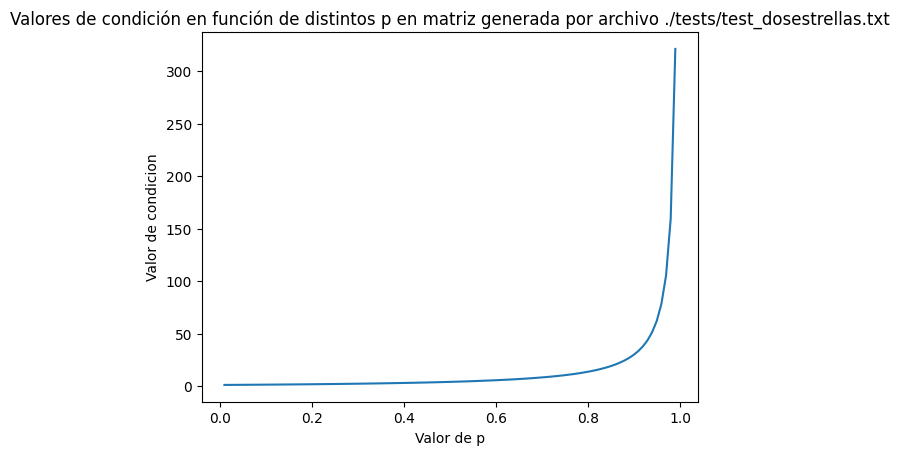

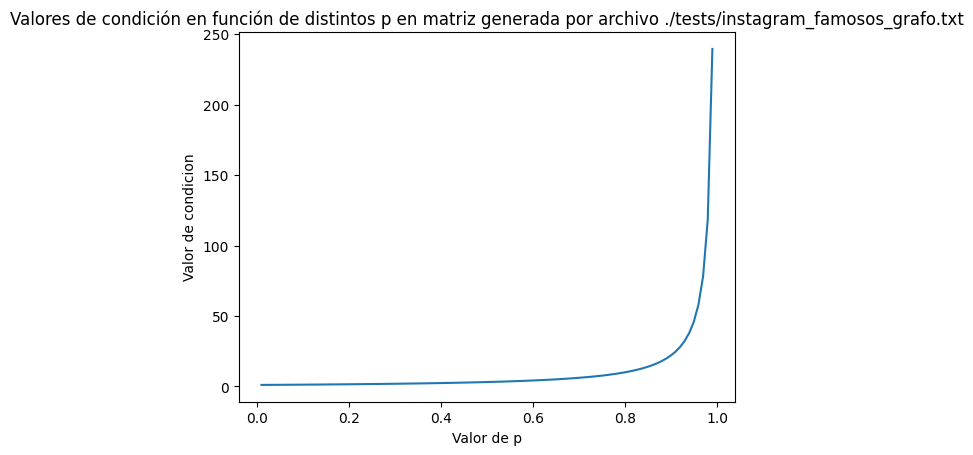

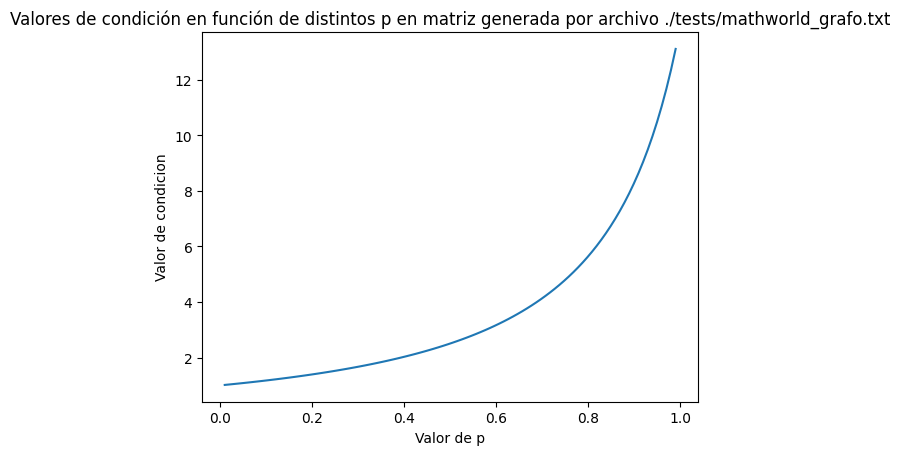

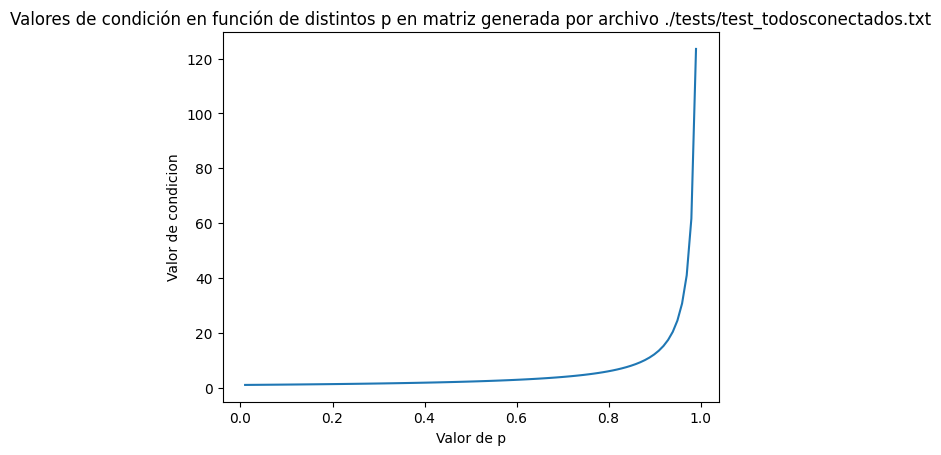

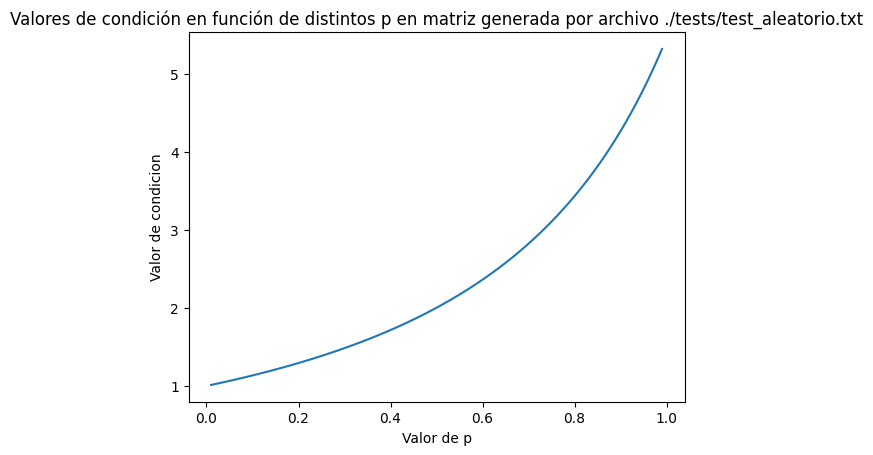

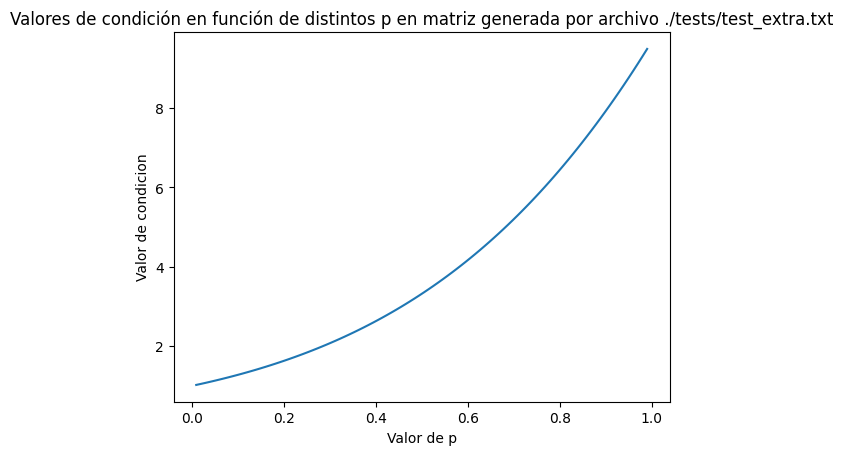

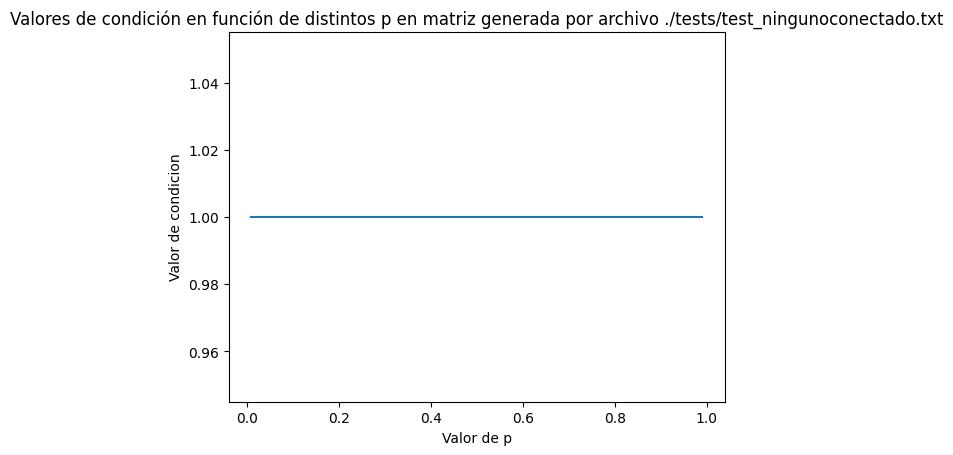

In [2]:
# Ver si I-pWD esta bien condicionada
def valores_condicion(archivo_test):
    W = leer_archivo(archivo_test)
    variac_p = np.linspace(0, 1, 100)[1:-1]
    valores = []
    ident = np.identity(np.shape(W)[0])
    D = armar_matriz_diagonal(W)
    for i in range(np.shape(variac_p)[0]):
        matriz = ident-(variac_p[i]*(W@D))
        valores.append((np.linalg.cond(matriz)))

    plt.title(f"Valores de condición en función de distintos p en matriz generada por archivo {archivo_test}")
    plt.xlabel("Valor de p")
    plt.ylabel("Valor de condicion")
    plt.plot(variac_p, valores)
    plt.show()

def val_cond_iterativos(archivos_test):
    
    for archivo_test in archivos_test:
        valores_condicion(archivo_test)

val_cond_iterativos(archivos_test)

En todos los casos, a excepción del "Ninguno conectado", vemos que el número de condición aumenta a medida que aumentamos $p$. Cuando $p$ tiende a 0, la matriz $pWD$ tiende a una matriz de ceros; por lo que si hacemos la resta $I - pWD$ nos aproximamos a la matriz identidad, que siempre tiene el número de condición igual a 1. Es por esto que en nuestros gráficos vemos que cuando $p$ es más cercano a 0, el número de condición se acerca a 1.

En el caso de "Ninguno conectado", vemos que la tendencia es constante ya que la matriz $WD$ es una matriz de ceros, por lo que el valor de $pWD = 0$ para todo $p$. Esto implica que $I-pWD = I$ para todo $p$. Como mencionamos anteriormente, el número de condición de la matriz identidad es 1.

---

## Implementación

*Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.*

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
0.18115942028985507
BIEN! - Paso correctamente el test unitario
**************************************************


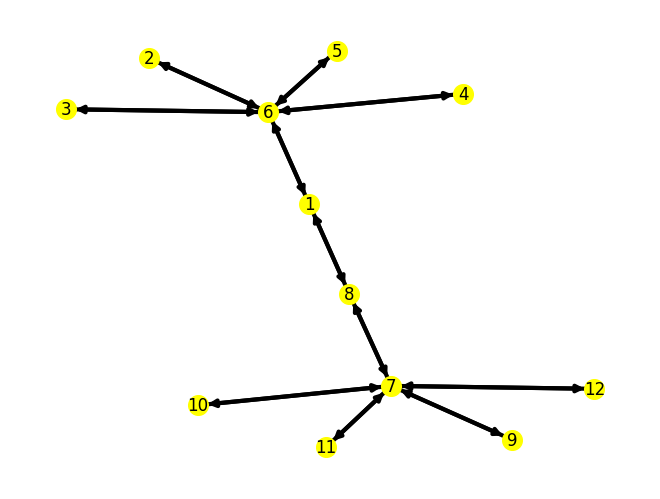

In [3]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la página actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    print(obtenerMaximoRankingScore(W, p))
    # Agregamos un decimal de precisión al test para que pase
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.18116))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas:

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas?
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

In [4]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_extra.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([1, 7, 6, 5, 4, 3, 2], dtype=int64),
 array([0.31111111, 0.08888889, 0.08888889, 0.08888889, 0.08888889,
        0.08888889, 0.24444444]))

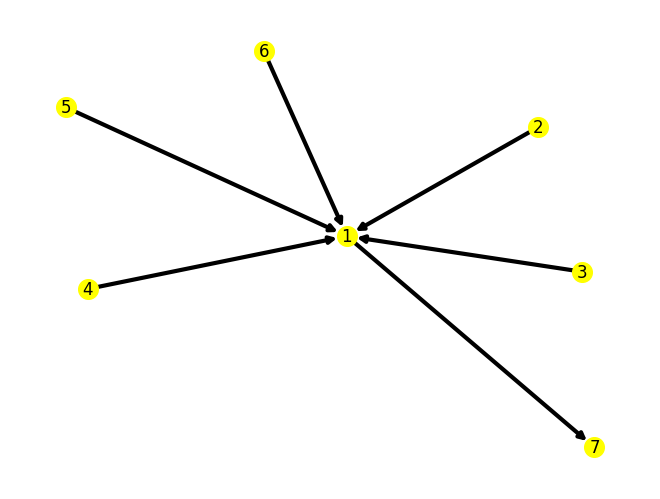

In [5]:
dibujarGrafo(W, print_ejes=False)

In [6]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_todosconectados.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([5, 4, 3, 2, 1], dtype=int64), array([0.2, 0.2, 0.2, 0.2, 0.2]))

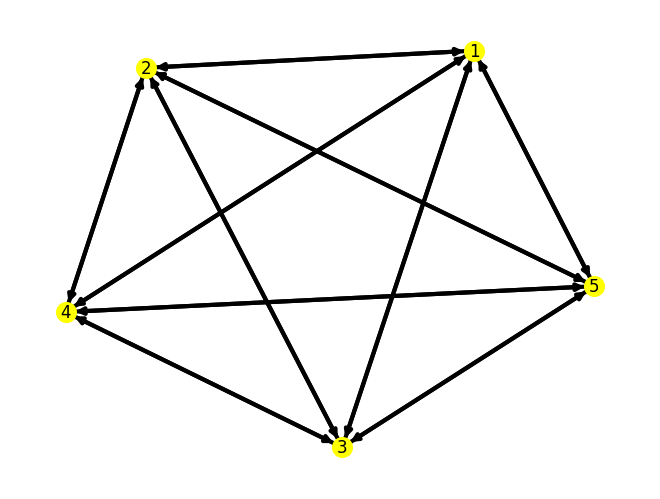

In [7]:
dibujarGrafo(W, print_ejes=False)

In [8]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_ningunoconectado.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([23, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 22, 13, 14, 15, 16,
        17, 18, 19, 20, 21,  1], dtype=int64),
 array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826]))

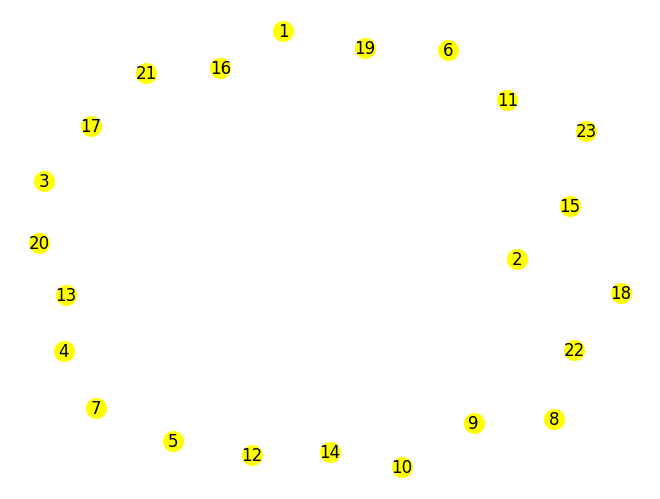

In [9]:
dibujarGrafo(W, print_ejes=False)

* **Todos los nodos conectados:** todos los nodos deberían tener el mismo puntaje, ya que todos tienen las mismas cantidades de conexiones de entrada y salida. El ranking sí variaría, pero esto depende de cómo hayamos realizado nuestro programa, lo importante es que el puntaje de lo mismo siempre sea para todos.

* **Ninguno conectado:** todos los nodos deberían tener el mismo puntaje (0), ya que todos tienen las mismas cantidades de conexiones de entrada y salida (nulas). El ranking sí variaría, pero esto depende de cómo hayamos realizado nuestro programa, lo importante es que el puntaje de lo mismo siempre sea para todos.

* **Test extra:** Para nuestro test extra escogimos un caso en el que todos se relacionen con el uno, excepto uno. Y este último nodo sea apuntado por el 1 y no apunte a nadie.
    En este caso esperamos: todas las páginas que apuntan a uno con igual puntaje (bajo), en segundo lugar el nodo que no apunta a nadie y lo apunta el 1, y luego el 1 en primer lugar ya que lo apuntan varios nodos.

Elegimos este test extra para evaluar el caso donde hay una página dominante respecto a las demás, ya que todas la apuntan, y luego una página periférica, pero que recibe su valor debido a que es la única página apuntada por la dominante. Nuestro objetivo es evaluar el peso que tiene la página dominante en los puntajes de las páginas apuntadas por ella.

Al evaluar los rankings, podemos confirmar que el peso que tiene la página dominante es altísimo, ya que eleva el puntaje de la página apuntada en gran medida. Sin embargo, esto va a depender por completo de la cantidad de páginas que apunten a 1; debido a que la cantidad de páginas apuntando a 1 va a determinar la dominancia de esta página respecto al resto.

Esto podría representar una página madre (un ejemplo podría ser una organización con sus suborganizaciones), que aparezca en todas las demás páginas (referenciándola, por ejemplo). Sin embargo, esta página de inicio no debería tener links a estas suborganizaciones, sino que solo un link a una página aislada. Esta página aislada, manteniéndonos en el ejemplo de una organización, podría ser un link a la historia de la organización

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


Para estudiar en detalle los tiempos de procesamiento, vamos a separar en dos criterios para estudiar cómo es la variación de los tiempos de procesamiento respecto a cada uno.

* **Primer criterio:** cantidad de páginas. Para este caso vamos a ir aumentando la cantidad de páginas, dejando constante la cantidad de relaciones (cero) y calculando su tiempo de procesamiento en cada caso.

In [10]:
def tiempo_ejecucion(W, p):
    tiempo_inicio = time.time()
    calcularRanking(W, p)
    return time.time() - tiempo_inicio

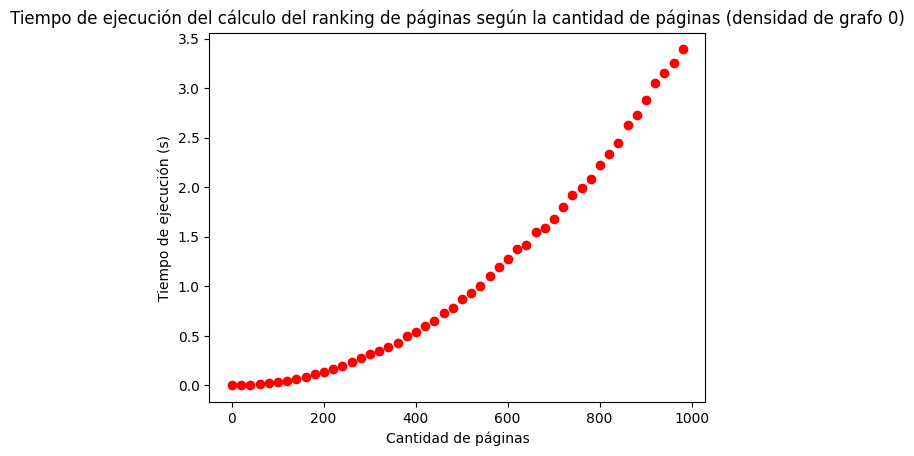

In [11]:
def graficoCantPaginas(cant_iteraciones, salto):
    # Defino p arbitrario
    p = 0.5

    tiempos_ejecucion = np.zeros(cant_iteraciones)
    cant_nodos = np.arange(1, cant_iteraciones*salto, salto)

    for i in range(1, cant_iteraciones*salto, salto):
        # Creo una matriz de conectividad de tamaño ixi sin conexiones (todos ceros)
        W = np.zeros((i,i)) 
        # Guardo el tiempo de ejecución para calcular el ranking
        tiempos_ejecucion[i//salto] = tiempo_ejecucion(W,p)


    plt.title("Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de páginas (densidad de grafo 0)")
    plt.xlabel("Cantidad de páginas")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.scatter(cant_nodos, tiempos_ejecucion, color ="red")
    plt.show()

# Con estos valores el código tarda aproximadamente 1 minuto en correr en nuestras máquinas. Disminuirlos para bajar el tiempo de ejecución.
graficoCantPaginas(50, 20)

Observamos una tendencia que se asemeja a la parte positiva de una funcion cúbica cuyo punto de inflexión se encuentra en el origen.

Nuestra deducción es que esto es acorde a lo esperado ya que al aumentar la cantidad de nodos del grafo, la matriz sobre la que aplicamos la factorización LU es más grande. La complejidad de realizar esta operación es de $O(\frac{2}{3}n^3)$ por lo que se condice el resultado con lo esperable.

Segundo criterio: densidad del grafo. Para este caso vamos a ir aumentando la cantidad de relaciones, dejando constante la cantidad de páginas (o nodos en el grafo)

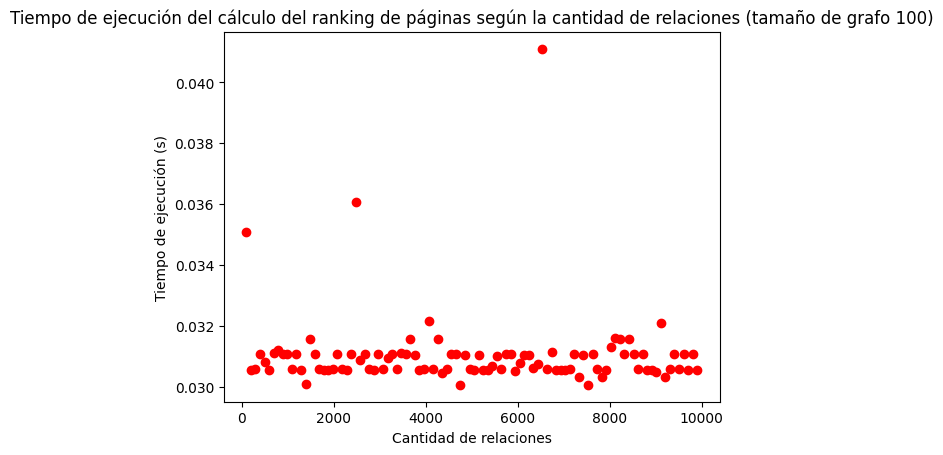

In [12]:
def graficoCantRelaciones(tamano_grafo):
    p = 0.5
    cant_relaciones = 0
    tiempos_ejecucion = np.zeros(tamano_grafo)
    cant_relaciones = np.zeros(tamano_grafo)

    W = np.zeros((tamano_grafo, tamano_grafo))
    cnt = 0
    for i in range(0, tamano_grafo):
        for j in range(0, tamano_grafo): # Dejo i fijo y voy agregando relaciones de i a cada j. Cuando pase por todos los i, voy a tener todas las relaciones posibles en mi matriz.
            if j != i:
                # Añado una relación a la matriz de la página i a la j
                W[j, i] = 1
                cnt+=1
        cant_relaciones[i] = cnt
        tiempos_ejecucion[i] = tiempo_ejecucion(W,p)

    plt.title(f"Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de relaciones (tamaño de grafo {tamano_grafo})")
    plt.xlabel("Cantidad de relaciones")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.scatter(cant_relaciones, tiempos_ejecucion, color ="red")
    plt.show()

graficoCantRelaciones(100)

Observamos una tendencia constante al aumentar la cantidad de relaciones en grafos con igual cantidad de nodos.

Nuestra deducción es que la matriz sobre la cual se realiza la factorización LU tiene el mismo tamaño pero diferentes valores, y en la cantidad de operaciones no afecta qué valores tengo, ya que la complejidad del algoritmo es de $O(\frac{2}{3}n^3)$, siendo n el tamaño de la matriz, es decir que no depende de los valores de la matriz.

Además, vemos varios puntos que no responden a la tendencia, y cada vez que ejecutamos el codigo nos devuelve un resultado distinto. Al tratarse de tiempos de ejecución tan bajos, pensamos que esto se debe a factores externos (computacionales) pero esperamos en general que el valor se mantenga constante.

Por esto, finalmente concluimos que el tiempo de ejecución no depende de la cantidad de relaciones, sino de la cantidad de nodos en el grafo.

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


Realizamos una función que grafica cómo se desarrolla el score de todos los nodos a medida que aumento $p$. En el contexto del PageRank, $p$ es un valor entre 0 y 1 que representa las probabilidades de que un usuario siga algún link saliente de la página actual. Además, hay $1−p$ probabilidades de que ingrese a cualquier página aleatoria.

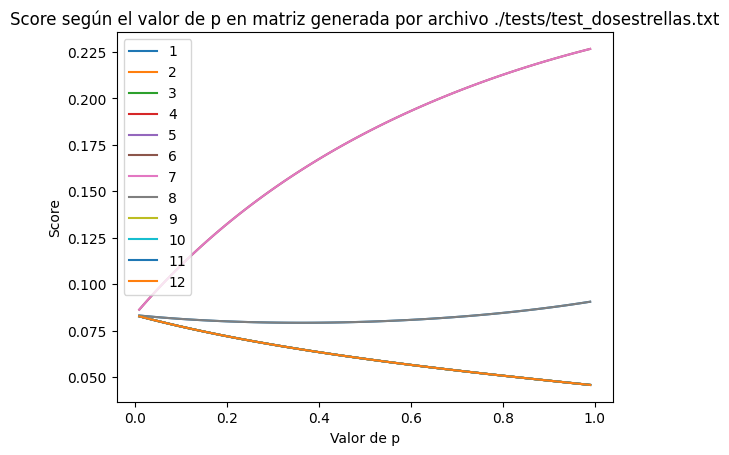

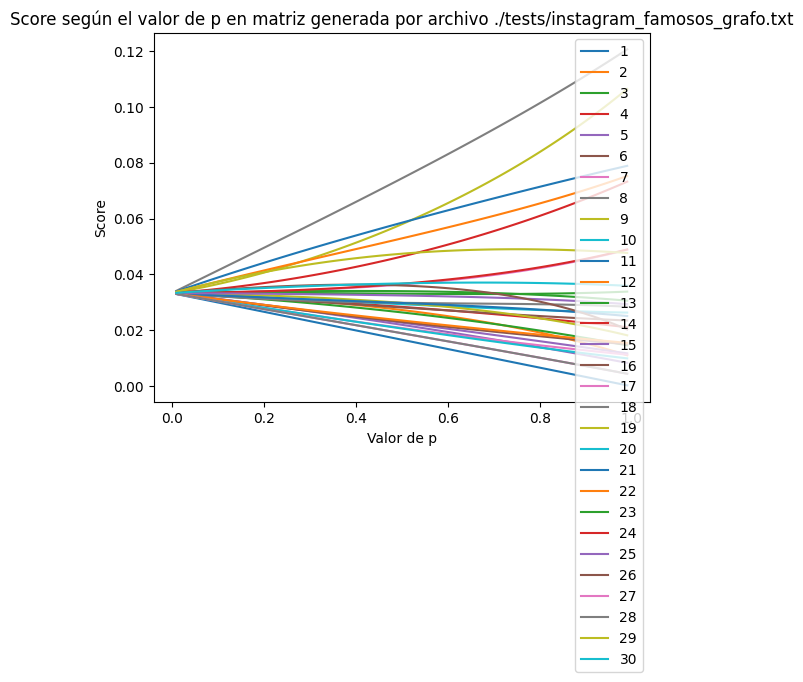

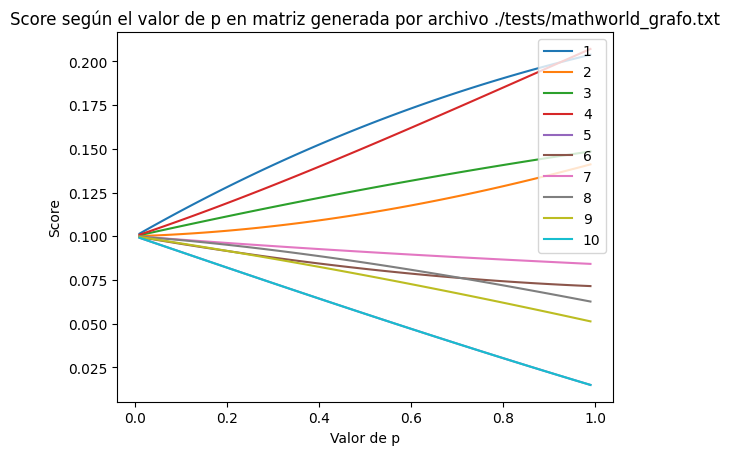

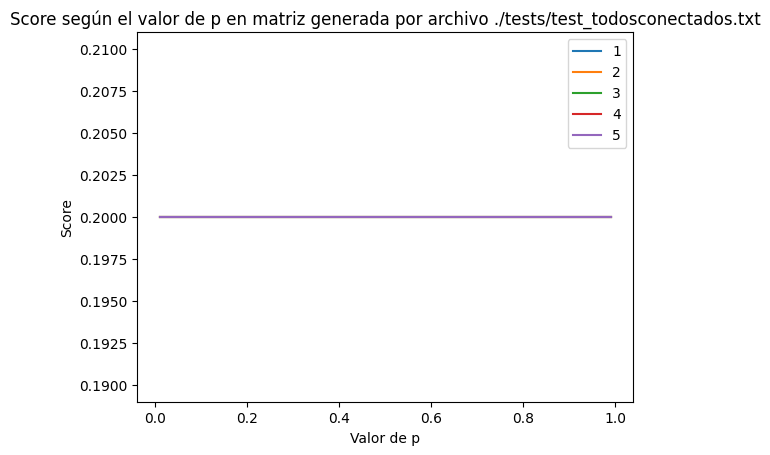

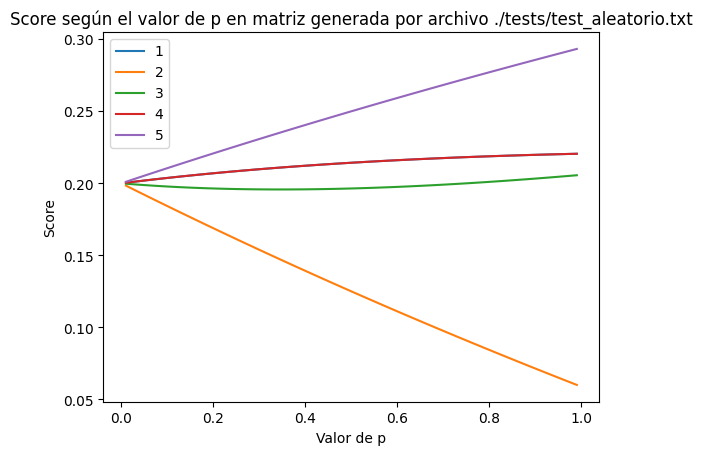

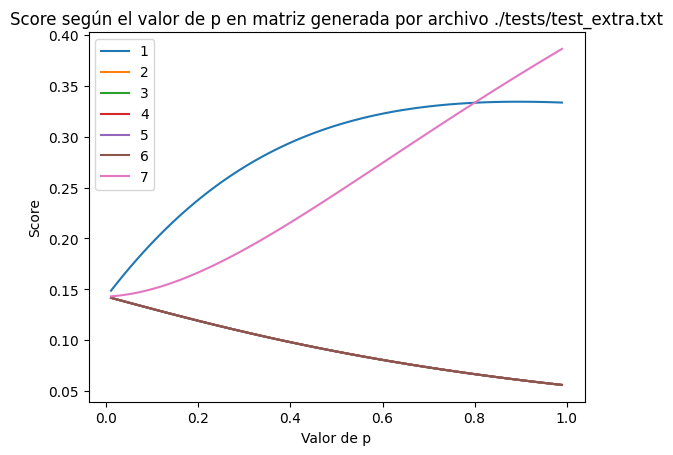

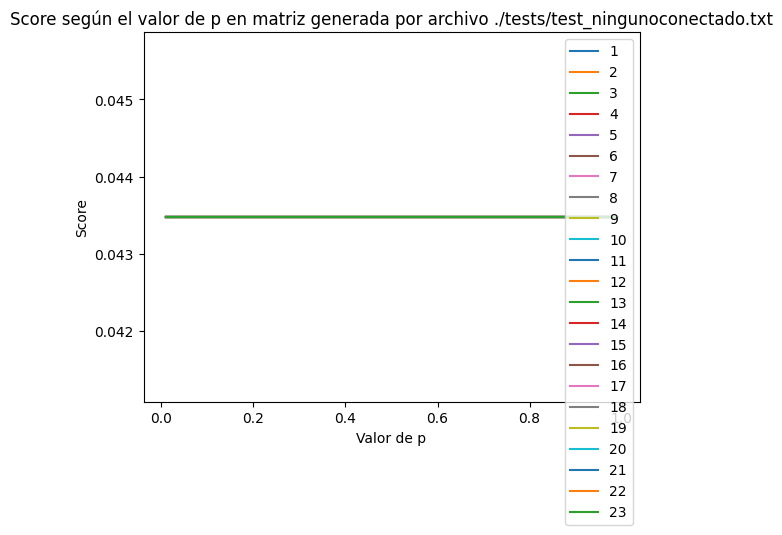

In [13]:
def graficarCualitativo(archivo_test):
    W = leer_archivo(archivo_test)
    x = np.linspace(0.01, 0.99, 100)

    for i in range(np.shape(W)[0]):
      # Obtengo todos los scores de cada nodo a medida que aumento el p
      scores_i = []
      for j in range(len(x)):
        # Dejo el nodo i fijo, calculo su score para cada p y los guardo en scores_i
        p_actual=x[j]
        rnk, scr = calcularRanking(W,p_actual)
        scores_i.append(scr[i])
      plt.plot(x, scores_i, label=str(i+1))
      plt.legend()

    plt.xlabel("Valor de p")
    plt.ylabel("Score")
    plt.title(f'Score según el valor de p en matriz generada por archivo {archivo_test}')
    plt.show()

for archivo_test in archivos_test:
    graficarCualitativo(archivo_test)

Se puede observar en los gráficos que, en general, los scores de las páginas son cercanos entre sí para valores de $p$ cercanos a $0$, y a medida que $p$ aumenta se empiezan a diferenciar.

Cuando p tiende a 0, el sistema lineal $(I−pWD)x=e$ (con $e$ un vector de unos) pasa a parecerse más al sistema $Ix=e$ cuya solución es un vector de unos, y si lo normalizamos resulta en un vector de probabilidades con todos los elementos iguales. Como la solución representa los puntajes de las páginas, tiene sentido que si la probabilidad $1−p$ de ingresar a cualquier página aleatoria crece, entonces el ranking va a tener los scores muy parecidos entre sí.

Realizamos un análisis en el cual integramos los gráficos cualitativos, contemplándolos a partir de la estructura de sus grafos correspondiente:

En el caso "Dos Estrellas", podemos ver que el grafo es simétrico y se diferencian 3 grupos de nodos con la misma jerarquía (esto implica que reciben y apuntan links de la misma importancia). Estos grupos son: (2,3,4,5,9,10,11,12), que no reciben nada y apuntan al 7 o al 6; el (7,6), que recibe del primer grupo y se apunta con 1 o el 8 respectivamente; y por último el (1,8), que se apuntan entre sí y apuntan al 7 y 6, respectivamente.

Lo que sucede cuando aumentamos p, y se refleja en los gráficos cualitativos, es que los elementos de cada grupo crecen a la par, es decir, se mantienen iguales dentro de su grupo. Por ende, en este análisis podemos concluir que si tenemos nodos que comparten jerarquía por completo (reciben y apuntan a nodos de la misma importancia), al modificar p, estos van a mantenerse a la par, compartiendo el mismo puntaje.

En el caso "Ninguno conectado" y "Todos conectados", todos los nodos forman parte de un mismo grupo jerárquico y no hay diferencias de jerarquía entre sí. Como explicamos en el caso de "dos estrellas", al modificar p, dentro de un mismo grupo jerárquico, crecen por igual, por ende se mantienen en el mismo grupo todo el tiempo.

En el caso "Extra" se diferencia un grupo que incluye a todos los nodos excepto el 1 y el 7 en el que todos apuntan al 1 sin recibir nada. El 1, por otro lado, apunta al 7, y el 7 no apunta a nadie. En el gráfico se puede ver cómo, a medida que aumenta el p, el grupo grande de nodos decrece en score, mientras que los nodos 1 y 7 crecen de forma diferente, de forma tal que el 1 empieza teniendo mejor score que el 7 y hay un estado de p a partir del cual el 7 tiene mejor score que el 1. A partir de esto, concluimos que los rankings pueden cambiar si solamente modifico el valor de $p$.

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta:

¿Cuál es la mínima cantidad de links que se deben agregar para que la página correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

Realizamos una función que busca las mejores conexiones para cada instancia de la matriz, con el fin de ir modificándola de la mejor manera posible hasta llegar a nuestro objetivo (que el nodo 1 sea el mejor nodo rankeado).

Para esto utilizamos la función auxiliar *buscar_mejor_conexion* que realiza k iteraciones, en las que hace la conexión de un nodo aleatorio con otro aleatorio, registrando los scores y buscando la mejor conexión posible, es decir, aquella que eleve más el puntaje de 1. Si se realizan más iteraciones, aumentan las probabilidades de que sea más precisa la mejor conexión encontrada, ya que la función recorre más posibilidades.


Luego, realizamos la función main *buscar_mejor_camino* que en cada iteración busca la conexión que más beneficie al 1 (con *buscar_mejor_conexion*), agrega esa conexión, y luego chequea si 1 es el nodo mejor rankeado. Si esto ocurre, la función devuelve el camino encontrado y cuántas iteraciones realizó, que es la cantidad de links nuevos que necesitamos para que la página correspondiente al nodo 1 quede primera en el ranking.

Mejor camino con 1000 iteraciones por conexión agregada:  ([(7, 1), (3, 1), (2, 1), (11, 1), (4, 1)], 5)
Mejor camino con 5 iteraciones por conexión agregada:  ([(12, 6), (9, 6), (4, 1), (11, 1), (3, 4), (7, 5), (3, 1), (12, 3), (5, 1), (2, 1), (9, 3), (11, 6), (7, 6), (10, 1), (10, 3), (10, 8), (10, 4), (1, 4), (12, 8), (12, 1)], 20)
Longitud de camino para p=0.0: 6
Longitud de camino para p=0.11: 6
Longitud de camino para p=0.22: 6
Longitud de camino para p=0.33: 7
Longitud de camino para p=0.44: 7
Longitud de camino para p=0.56: 7
Longitud de camino para p=0.67: 6
Longitud de camino para p=0.78: 5
Longitud de camino para p=0.89: 5
Longitud de camino para p=1.0: 5


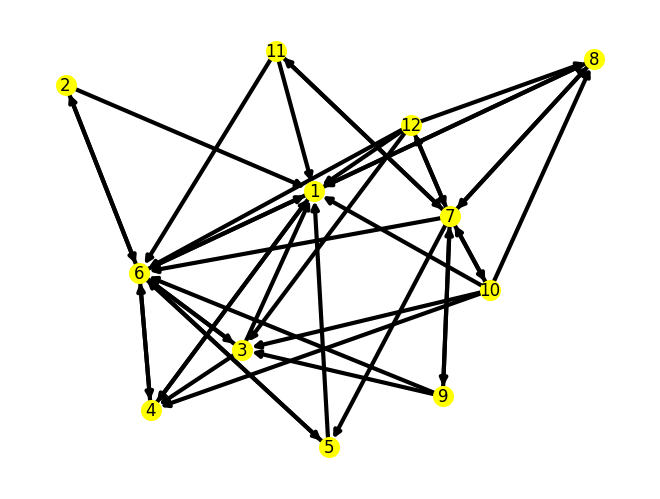

In [30]:
archivo_test = './tests/test_dosestrellas.txt'

W = leer_archivo(archivo_test)

def buscar_mejor_conexion(W, k):
    """
    Realiza k iteraciones para encontrar la conexión que mas le aumenta el puntaje al nodo 1.
    

    Parámetros:
        W: Matriz de conectividad, cuadrada de tamaño nxn.
        k: Cantidad de iteraciones.

    Devuelve:
        mejor_conexion: Tupla de dos nodos, donde el primer elemento es el nodo saliente y el segundo elemento es
        el nodo entrante de la conexion que más le aumenta el puntaje al nodo 1.
    """
    max_score = 0
    
    mejor_conexion = (-1,-1)
    for _ in range(k): 
        n = 1
        m = 1
        while n == m or W[m-1, n-1] == 1:
            n = np.random.randint(1,13)
            m = np.random.randint(1,13)
        W[m-1, n-1] = 1
        rnk, scr = calcularRanking(W, p)
        scr_nodo1 = scr[0]
        if scr_nodo1 > max_score:
            max_score = scr_nodo1
            mejor_conexion = (n,m)
        W[m-1, n-1] = 0
    return mejor_conexion

def buscar_mejor_camino(W, k, p):
    """
    Encuentra el camino más corto para que el nodo 1 sea el mejor rankeado.
    

    Parámetros:
        W: Matriz de conectividad, cuadrada de tamaño nxn.
        k: Cantidad de iteraciones.

    Devuelve:
        camino: lista de tuplas de dos nodos, donde el primer elemento es el nodo saliente y el segundo elemento es
        el nodo entrante de la conexión que mas le aumenta el puntaje al nodo 1 para cada instancia.
        len(camino): longitud del mejor camino encontrado.
    """
    camino = []
    rnk, scr = calcularRanking(W, p)
    while rnk[0] != 1:
        n, m = buscar_mejor_conexion(W, k)
        camino.append((n,m))
        W[m-1][n-1] = 1 
        rnk, scr = calcularRanking(W, p)
    
    return camino, len(camino)
        
Wc = W.copy()
print("Mejor camino con 1000 iteraciones por conexión agregada: ", buscar_mejor_camino(Wc, 1000, 0.9))

Wc = W.copy()
print("Mejor camino con 5 iteraciones por conexión agregada: ", buscar_mejor_camino(Wc, 5, 0.9))

dibujarGrafo(Wc, print_ejes=False)

for p in np.linspace(0.001, 0.999, 10): # Veo que pasa para distintos p
    Wc = W.copy()
    print(f"Longitud de camino para p={round(p,2)}: {buscar_mejor_camino(Wc, 200, p)[1]}")

Decidimos utilizar k=1000 considerando el tiempo de ejecución.

Para este k, encontramos que, ejecutando varias veces el código, el mejor camino siempre es conectando en todos los pasos algún nodo con el 1. En las pruebas que realizamos encontramos varios caminos distintos, pero al ser un grafo con nodos de peso equivalente esto es esperable. Sin embargo, debido a la aleatoriedad de nuestra funcion *buscar_mejor_conexion*, podría suceder que no se encuentre la mejor conexión absoluta, por lo que podríamos encontrar alguna diferencia en los resultados.

Por ejemplo, cuando bajamos el valor de k a 5, uno de los resultados que nos dio fue un camino con 17 pasos, que claramente este no es el mejor camino posible. Esto se debe a que, en las 5 iteraciones que se hacen para buscar cada mejor conexión, es poco probable que encuentre la mejor posible.

Otro aspecto a tener en cuenta para encontrar el mejor camino es el valor de $p$ elegido. Vemos que, en promedio, el camino más corto encontrado requiere más pasos para $p$ más pequeño. Además, recordamos del análisis cualitativo que, a medida que $p$ se acerca a 0, los scores de las páginas se acercan más entre sí. Esto tiene sentido ya que si $p$ es pequeño, los links entrantes nuevos al nodo 1 afectarán mucho menos en su score, ya que este deja de depender tanto de sus conexiones.

En conclusión, encontramos que la mínima cantidad de links que se deben agregar para que la página correspondiente al nodo 1 quede primera en el ranking es 5 y consiste en agregar en cada paso una conexión que apunte al 1. 